evaluation project 9
Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [1]:
# import libraries
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
idata=pd.read_csv('loan_insurance.csv')

In [4]:
df=pd.DataFrame(idata)


In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

here ther are int,float and object datatpes are used

In [10]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The target variable has two instances yes and there is no, which tells us about whether the customer is reported fraud or not



(array([ 88., 102., 153., 130., 148., 167.,  80.,  43.,  42.,  47.]),
 array([  0. ,  47.9,  95.8, 143.7, 191.6, 239.5, 287.4, 335.3, 383.2,
        431.1, 479. ]),
 <BarContainer object of 10 artists>)

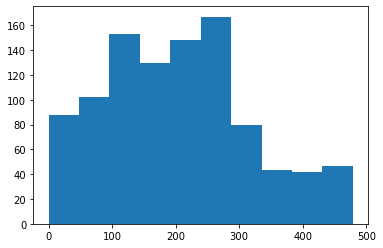

In [12]:
plt.hist(df['months_as_customer'])


In [13]:
df['insured_hobbies'].value_counts()


reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [19]:
df.shape


(1000, 40)

In [18]:
#check missing or null or any values
print("Null Values: " + str(df.isnull().any().sum()))


Null Values: 1


<AxesSubplot:xlabel='fraud_reported'>

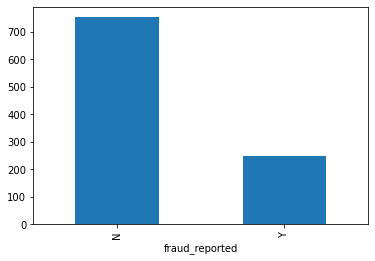

In [16]:
#Fraud Reported Stats
df_count_fraud = df.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')


<AxesSubplot:xlabel='insured_education_level'>

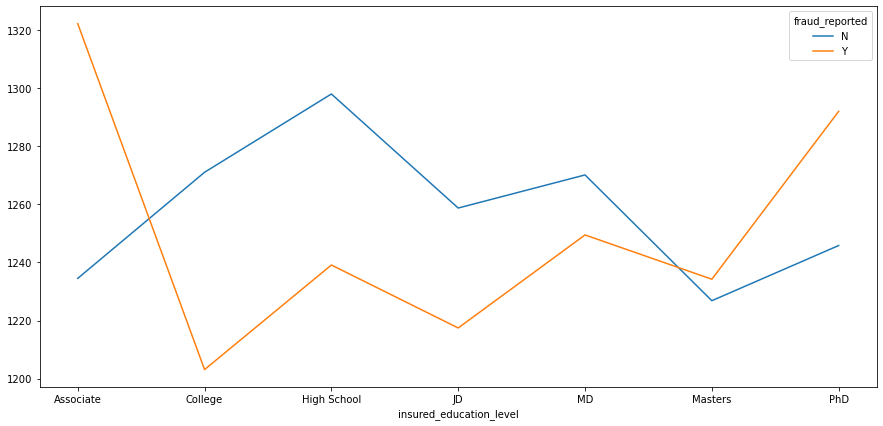

In [20]:
#Annual premium of education level policy_annual_premium
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = df.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)


<AxesSubplot:xlabel='insured_occupation'>

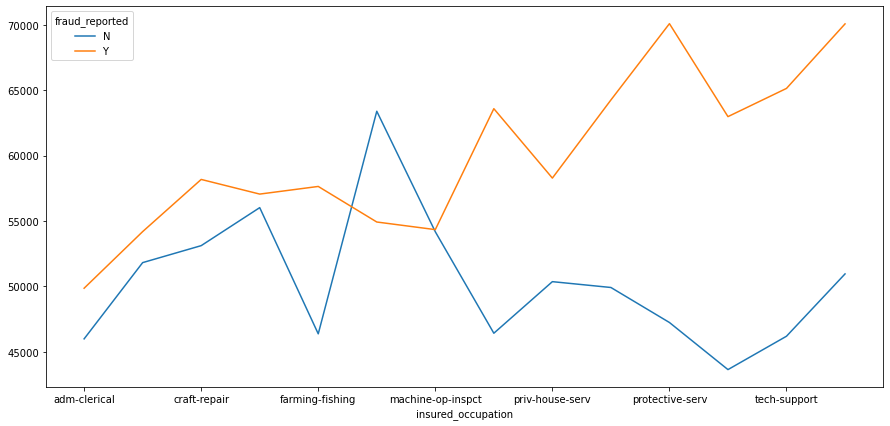

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)


In [23]:
df['policy_number'].unique


<bound method Series.unique of 0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64>

In [24]:
df.drop(['policy_number'],axis=1,inplace=True)


The policy number is unique IDs given for each instance which doesn't make any impact on target variable so we can drop that column


In [25]:
df.nunique()


months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries             

In [26]:
df.isnull().sum()


months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [27]:
#As _c39 has no any data in it we can drop that columns as well
df.drop(['_c39'],axis=1,inplace=True)


In [29]:
# Encoding the columns that has object dtype
Object_columns=df.select_dtypes(include=[object])
Object_columns.head(2)


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns in Object_columns:
    df[columns] = le.fit_transform(df[columns])



In [31]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involv

now all the columns in the dataset are in float and integer data types



In [32]:
pd.set_option('display.max_columns', None)
df.describe()


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.666000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,1.063755,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Key Observations :

mean > median (50th Percentile) in the columns policy_deductable, capital-gains, injury_claim, property_claim these variables have skewed data

we can find high gap between 75% and max in the variables months_as_customer, age, policy_bind_date, policy_annual_premium, 

capital-gain, incident_type, incident_location there are outliers present in thses data


In [34]:
df.corr()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.002985,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,0.002416,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_bind_date,0.055055,0.056538,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,0.040606,0.006720,0.020085,0.017710,-0.004535,-0.026123,0.008022,0.000164,0.004271,-0.055760,-0.032065,0.043035,0.034437,-0.001244,-0.012582,-0.002381,-0.011615,-0.046970,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.027287,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,-0.010140,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.024055,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.028257,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,-0.009471,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,0.027113,-0.010840,-0.045313,-0.023855,-0.017548,-0.047669,-0.017532,-0.013847,0.008274,0.027448,0.060342,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.039338,-0

<AxesSubplot:>

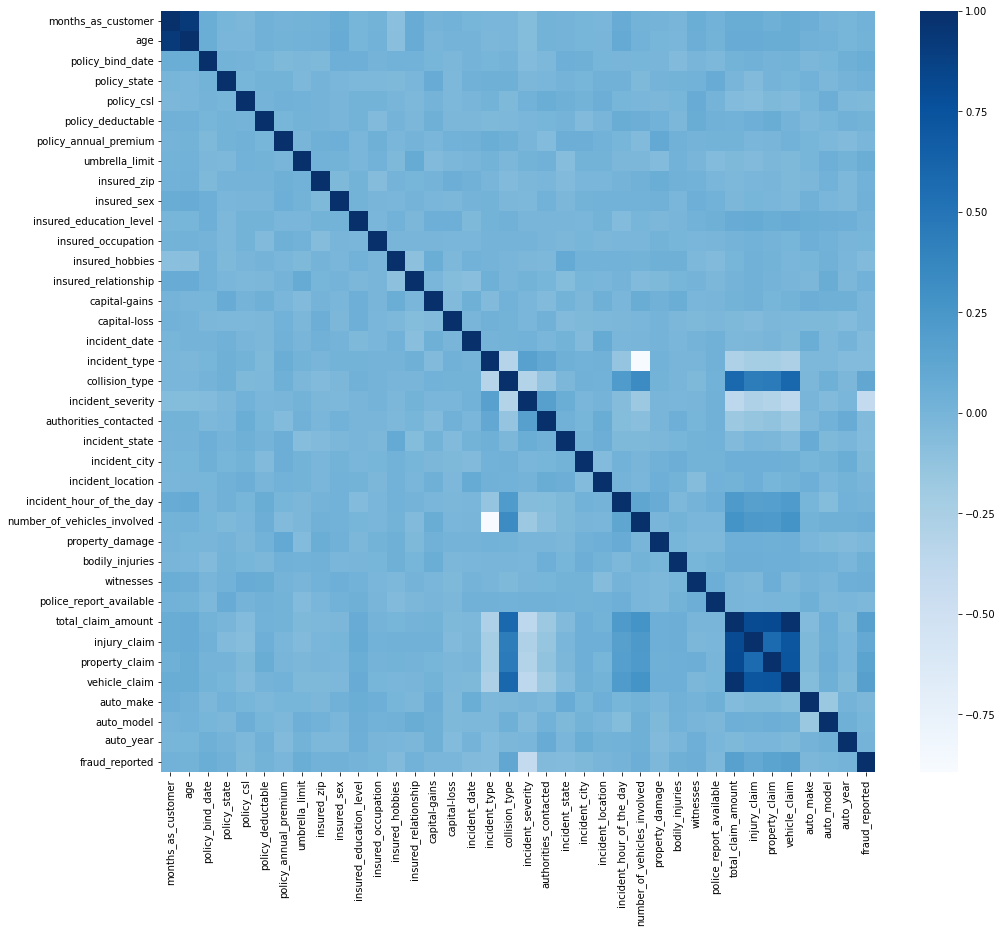

In [35]:
plt.figure(figsize = (16,14))
sns.heatmap(df.corr(),cmap='Blues')


Key Observation :

    We can see that fraud_reported has good correlation with vehicle_claim, property_claim, injury_claim, total_claim_amount and collision_type

It has neagtive correlation with incident severity


months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_bind_date               AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_state                   AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_csl                        AxesSubplot(0.125,0.739237;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
umbrella_limit                 AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
insured_zip                       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
insured_sex                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
insured_education_level        AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
insured_occupation             AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
insured_hobbies             

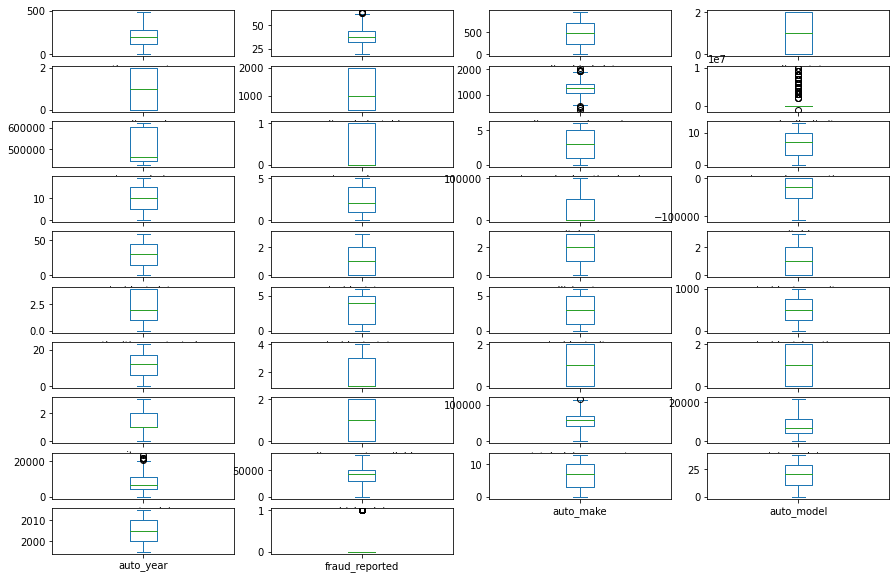

In [36]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(15,10))


In [40]:
#Removed Less Correlated Columns


In [41]:
from scipy.stats import zscore
outliers=['policy_annual_premium','umbrella_limit']
for col in outliers:
    z=np.abs(zscore(df[col]))


In [42]:
Threshold=3
print(np.where(z>3))


(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int64),)


In [43]:
df_new=df[(z<3)]
df_new


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,3,1,4,0,0,746,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,2,0,3,1,0,569,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0


In [44]:
df.shape


(1000, 38)

In [45]:
df_new.shape


(985, 38)

There are 1000 rows and 38 columns in the old dataset

There are 985 rows and 38 columns in new dataset after removing outliers



In [46]:
# Now we can check for data loss

Dataloss = (((1000-985)/1000)*100)
Dataloss
1

1

We can observe that dataloss in zscore method after removing outliers of 1% which is less than 10%



In [47]:
df_new.skew()


months_as_customer             0.365896
age                            0.480506
policy_bind_date               0.000778
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.478157
policy_annual_premium          0.007310
umbrella_limit                 1.809619
insured_zip                    0.829416
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.466050
capital-loss                  -0.388917
incident_date                  0.004798
incident_type                  0.091063
collision_type                -0.194288
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
incident_location             -0.003796
incident_hour_of_the_day      -0.034538


In [48]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [49]:
df_new[['umbrella_limit']]=scaler.fit_transform(df_new[['umbrella_limit']].values)


In [50]:
x=df_new.drop(['fraud_reported'],axis=1)
x.sample()


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
739,194,34,516,1,0,1000,1423.34,-0.335859,454399,1,0,11,4,1,55300,-37900,41,3,0,1,2,6,5,828,0,1,2,0,3,1,9100,1400,1400,6300,3,25,2003


In [51]:
y=df_new['fraud_reported']
y


0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 985, dtype: int32

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [53]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [54]:
vif_calc()


    VIF Factor                     Features
0    28.487256           months_as_customer
1   131.632561                          age
2     4.058601             policy_bind_date
3     2.589455                 policy_state
4     2.458555                   policy_csl
5     4.645027            policy_deductable
6    28.293737        policy_annual_premium
7     1.034228               umbrella_limit
8    51.861992                  insured_zip
9     1.913308                  insured_sex
10    3.430467      insured_education_level
11    3.804475           insured_occupation
12    4.131980              insured_hobbies
13    3.217278         insured_relationship
14    1.887852                capital-gains
15    1.985727                 capital-loss
16    4.019987                incident_date
17   11.255099                incident_type
18    5.924986               collision_type
19    3.127886            incident_severity
20    3.211168        authorities_contacted
21    3.414730               inc

In [92]:
#x.drop(['auto_year','injury_claim',],axis=1,inplace=True)


In [93]:
#x.drop(['vehicle_claim','age',],axis=1,inplace=True)


In [62]:
vif_calc()

    VIF Factor                     Features
0     4.262742           months_as_customer
1     3.937854             policy_bind_date
2     2.542091                 policy_state
3     2.428831                   policy_csl
4     4.518650            policy_deductable
5    22.807097        policy_annual_premium
6     1.033223               umbrella_limit
7     1.902126                  insured_sex
8     3.379928      insured_education_level
9     3.675547           insured_occupation
10    4.019297              insured_hobbies
11    3.105927         insured_relationship
12    1.886122                capital-gains
13    1.978772                 capital-loss
14    3.907767                incident_date
15    7.907499                incident_type
16    5.869550               collision_type
17    2.975461            incident_severity
18    3.144604        authorities_contacted
19    3.380104               incident_state
20    3.201393                incident_city
21    4.124793            incide

In [94]:
#x.drop(['insured_zip'],axis=1,inplace=True)


In [64]:
vif_calc()

    VIF Factor                     Features
0     4.262742           months_as_customer
1     3.937854             policy_bind_date
2     2.542091                 policy_state
3     2.428831                   policy_csl
4     4.518650            policy_deductable
5    22.807097        policy_annual_premium
6     1.033223               umbrella_limit
7     1.902126                  insured_sex
8     3.379928      insured_education_level
9     3.675547           insured_occupation
10    4.019297              insured_hobbies
11    3.105927         insured_relationship
12    1.886122                capital-gains
13    1.978772                 capital-loss
14    3.907767                incident_date
15    7.907499                incident_type
16    5.869550               collision_type
17    2.975461            incident_severity
18    3.144604        authorities_contacted
19    3.380104               incident_state
20    3.201393                incident_city
21    4.124793            incide

In [65]:
x.drop(['policy_annual_premium'],axis=1,inplace=True)


In [66]:
vif_calc()

    VIF Factor                     Features
0     4.245265           months_as_customer
1     3.933754             policy_bind_date
2     2.531221                 policy_state
3     2.414337                   policy_csl
4     4.484225            policy_deductable
5     1.033161               umbrella_limit
6     1.896292                  insured_sex
7     3.374447      insured_education_level
8     3.623297           insured_occupation
9     4.008362              insured_hobbies
10    3.073821         insured_relationship
11    1.886078                capital-gains
12    1.978116                 capital-loss
13    3.856659                incident_date
14    6.888448                incident_type
15    5.840363               collision_type
16    2.944264            incident_severity
17    3.144589        authorities_contacted
18    3.348416               incident_state
19    3.172495                incident_city
20    4.110607            incident_location
21    4.090773     incident_hour

In [67]:
x.drop(['number_of_vehicles_involved'],axis=1,inplace=True)


In [68]:
vif_calc()

    VIF Factor                  Features
0     4.194781        months_as_customer
1     3.873844          policy_bind_date
2     2.524021              policy_state
3     2.404948                policy_csl
4     4.311143         policy_deductable
5     1.033052            umbrella_limit
6     1.871466               insured_sex
7     3.338812   insured_education_level
8     3.568025        insured_occupation
9     3.889595           insured_hobbies
10    3.034310      insured_relationship
11    1.876084             capital-gains
12    1.978103              capital-loss
13    3.799154             incident_date
14    2.413119             incident_type
15    5.704021            collision_type
16    2.878885         incident_severity
17    3.085288     authorities_contacted
18    3.322459            incident_state
19    3.121938             incident_city
20    4.045294         incident_location
21    4.065156  incident_hour_of_the_day
22    2.358573           property_damage
23    2.496975  

In [69]:
x.drop(['property_claim'],axis=1,inplace=True)


In [71]:
vif_calc()

    VIF Factor                  Features
0     4.182816        months_as_customer
1     3.872742          policy_bind_date
2     2.523801              policy_state
3     2.404748                policy_csl
4     4.293843         policy_deductable
5     1.033018            umbrella_limit
6     1.871448               insured_sex
7     3.337573   insured_education_level
8     3.567828        insured_occupation
9     3.889085           insured_hobbies
10    3.034307      insured_relationship
11    1.874321             capital-gains
12    1.976649              capital-loss
13    3.796814             incident_date
14    2.412261             incident_type
15    5.683943            collision_type
16    2.874118         incident_severity
17    3.083016     authorities_contacted
18    3.322149            incident_state
19    3.121899             incident_city
20    4.038575         incident_location
21    4.064925  incident_hour_of_the_day
22    2.357887           property_damage
23    2.496940  

Hence the multicollinearity is removed from  the dataset

# Splitting the data for training and testing the model




In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((738, 29), (247, 29), (738,), (247,))

In [74]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()


In [75]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    print('**************************************************')

Accuracy score of  LogisticRegression() is : 
0.7368421052631579
[[182   1]
 [ 64   0]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       183
           1       0.00      0.00      0.00        64

    accuracy                           0.74       247
   macro avg       0.37      0.50      0.42       247
weighted avg       0.55      0.74      0.63       247



**************************************************
Accuracy score of  GaussianNB() is : 
0.7651821862348178
[[169  14]
 [ 44  20]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       183
           1       0.59      0.31      0.41        64

    accuracy                           0.77       247
   macro avg       0.69      0.62      0.63       247
weighted avg       0.74      0.77      0.74       247



**************************************************
Accuracy score of  SVC() is : 
0.7408906882591093
[[183   0]
 [ 64   0]]

Accuracy score of  RandomForestClassifier() is : 0.7611336032388664
and Accuracy score of  GaussianNB() is : 0.7651821862348178



In [76]:
from sklearn.model_selection import cross_val_score


In [78]:
for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')
    print('==============================================')

Score of :  LogisticRegression()
[76.35135135 75.67567568 75.         76.8707483  76.19047619]
76.01765030336459
0.6358553535682543


Score of :  GaussianNB()
[76.35135135 72.2972973  73.64864865 74.82993197 70.74829932]
73.57510571796286
1.9447964460266667


Score of :  SVC()
[76.35135135 75.67567568 75.67567568 76.19047619 76.19047619]
76.01673101673101
0.2845990268660965


Score of :  DecisionTreeClassifier()
[79.72972973 77.02702703 75.67567568 82.31292517 79.59183673]
78.86743886743888
2.3114558908835585


Score of :  KNeighborsClassifier()
[71.62162162 69.59459459 69.59459459 70.74829932 70.06802721]
70.32542746828462
0.7737477827987431


Score of :  RandomForestClassifier()
[79.05405405 76.35135135 76.35135135 78.23129252 76.8707483 ]
77.37175951461666
1.086498023632715




In [79]:
# Parameter tuning DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


In [80]:
dtc=DecisionTreeClassifier()
params={'criterion':['gini','entropy','log_loss']}


In [81]:
grd=GridSearchCV(estimator=dtc,param_grid=params,cv=5)


In [82]:
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [83]:
grd.best_score_


0.8022154807869093

In [84]:
grd.best_params_


{'criterion': 'entropy'}

In [85]:
#Final model
Final_model=DecisionTreeClassifier(criterion='gini')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.7894736842105263
[[161  22]
 [ 30  34]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       183
           1       0.61      0.53      0.57        64

    accuracy                           0.79       247
   macro avg       0.73      0.71      0.71       247
weighted avg       0.78      0.79      0.78       247



In [86]:
# We can save the model now
import joblib
joblib.dump(Final_model,'Insurance_fraud_Prediction.obj')


['Insurance_fraud_Prediction.obj']

In [87]:
# Loading the saved model and predicting the values

Fraud=joblib.load('Insurance_fraud_Prediction.obj')


In [88]:
pred=Fraud.predict(x_test)
print("Predicted values :",pred)


Predicted values : [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [89]:
y_test


623    1
460    1
743    1
444    0
281    1
      ..
607    0
209    0
524    0
638    1
958    0
Name: fraud_reported, Length: 247, dtype: int32

In [90]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1


,Predicted values,Original values
623,0,1
460,0,1
743,0,1
444,0,0
281,0,1
...,...,...
607,0,0
209,0,0
524,0,0
638,1,1


completed the task